最適化(optimization)
--

optimizer

- `update()`メソッドをもつ

SGD(stochastic gradient descent)：確率的勾配降下法

- 単純で簡単
- 関数の形状によっては非効率な場合がある

Momentum

- 物理的な運動量に相当するものを持つ
- SGDに比べ、ジグザクの動きを軽減

AdaGrad

- 学習係数を学習が進みに連れ減衰させる

Adam

- Momentum + AdaGrad


重みの初期値
--

- 初期値を0にしてしまうと正しい学習がおこなえない
- アクティベーション分布をみて、広がりのある初期値となるようにしたい
- 活性関数にReLUを使い場合はHeの初期値、sigmidやtanhなどのS字カーブのときはXavierの初期値を使う、がベスト・プラクティス
- Batch Normalizationが近年よく使われてる

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def plotHist(activations):
    plt.figure(figsize=(10, 2))
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        plt.hist(a.flatten(), 30, range=(0,1))
    plt.show()

node_num = 100
hidden_layer_size = 5

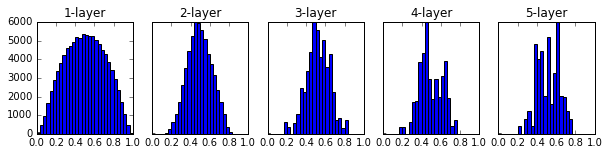

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # Xavierの初期値

    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

plotHist(activations)

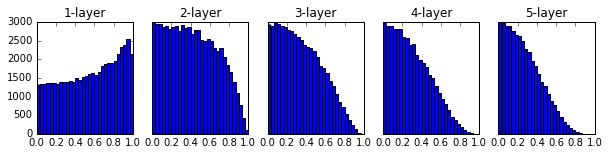

In [33]:
def tanh(x):
    return np.tanh(x)

x = np.random.randn(1000, 100)
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # Xavierの初期値

    z = np.dot(x, w)
    a = tanh(z)
    activations[i] = a

plotHist(activations)

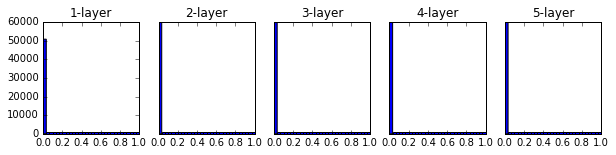

In [34]:
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # Xavierの初期値
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num) # Heの初期値

    z = np.dot(x, w)
    a = ReLU(z)
    activations[i] = a

plotHist(activations)

正規化
--

- 過学習を抑制する

Weight decay（荷重減衰）

- 大きな重みを持つことにペナルティを課す

Dropout

- ニューロンをランダムに消去する

ハイパーパラメータ

- 重みやバイアスとは別
- 各層のニューロンの数、バッチサイズ、学習係数、Weight decayなどのパラメータのこと
- ハイパーパラメータを最適化するには長い時間がかかる
